# DA5401: Assignment 2 - Dimensionality Reduction, Visualization, and Classification Performance

Importing the necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## Part A: Exploratory Data Analysis (EDA) & Preprocessing



### 1. Load and Prepare the Dataset

In [3]:
# Load the dataset
mushroom_df = pd.read_csv('mushrooms.csv')

Display basic information

In [4]:
print("Dataset Shape:", mushroom_df.shape)
print("\nFirst few rows:")
mushroom_df.head()

Dataset Shape: (8124, 23)

First few rows:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Let's examine the data types and check for missing values.

In [5]:
print("Dataset Info:")
mushroom_df.info()

print("\nMissing values in each column:")
mushroom_df.isnull().sum()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-colo

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


All features are categorical, and there are no missing values. Now let's examine the class distribution.

In [6]:
print("Class distribution:")
print(mushroom_df['class'].value_counts())
print("\nPercentage distribution:")
print(mushroom_df['class'].value_counts(normalize=True) * 100)

Class distribution:
class
e    4208
p    3916
Name: count, dtype: int64

Percentage distribution:
class
e    51.797144
p    48.202856
Name: proportion, dtype: float64


The dataset is fairly balanced between edible (e) and poisonous (p) mushrooms.


---



**Performing One-Hot Encoding and Separate the features (X) from the target variable (y)**

**One-Hot Encoding:-** Since all features are categorical, we need to apply one-hot encoding before using PCA. PCA works with numerical data and assumes linear relationships between variables. One-hot encoding converts categorical variables into a binary (0/1) format that can be used by PCA.

In [7]:
# Perform one-hot encoding
X = pd.get_dummies(mushroom_df.drop('class', axis=1))
y = mushroom_df['class']

### 2. Initial Analysis

In [8]:
print("Shape after one-hot encoding:", X.shape)
print("Number of features increased from", mushroom_df.shape[1]-1, "to", X.shape[1])

Shape after one-hot encoding: (8124, 117)
Number of features increased from 22 to 117


The number of features has significantly increased from 22 to 117 after one-hot encoding. This demonstrates the "curse of dimensionality" where the feature space becomes sparse, making some machine learning algorithms less effective.


---



### 3. Standardization

Even though our one-hot encoded features are binary, standardization is still important for PCA. PCA is sensitive to the scale of variables, and standardizing ensures that all features contribute equally to the analysis. Without standardization, features with larger scales would dominate the principal components.

Standardize the features

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Convert back to DataFrame for better readability

In [10]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("Standardized features sample:")
X_scaled_df.head()

Standardized features sample:


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
1,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582
2,4.119885,-0.022195,-0.79621,-0.336878,-0.062885,-0.904579,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,5.178988,-0.404842,-0.217824,-0.155582
3,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,-0.677534,1.226505,...,2.347257,-0.994599,-0.51672,-0.795385,-0.599531,-0.337783,-0.193088,-0.404842,4.590870,-0.155582
4,-0.242725,-0.022195,-0.79621,-0.336878,-0.062885,1.105487,-0.632238,-0.022195,1.475942,-0.815325,...,-0.426029,-0.994599,-0.51672,-0.795385,1.667970,-0.337783,-0.193088,-0.404842,-0.217824,-0.155582


## Part B: Principal Component Analysis (PCA)

### 1. Apply PCA

Let's apply PCA to our standardized dataset to reduce dimensionality while preserving as much variance as possible.

Apply PCA without specifying number of components

In [11]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio for first 10 components:")
print(pca.explained_variance_ratio_[:10])

Explained variance ratio for first 10 components:
[0.08891017 0.08125474 0.07203601 0.0585865  0.05188137 0.04393849
 0.04053112 0.02831716 0.02355807 0.02237647]


### 2. Score Plot & Optimal Components

Let's create a scree plot to visualize the explained variance and cumulative explained variance to determine the optimal number of components.

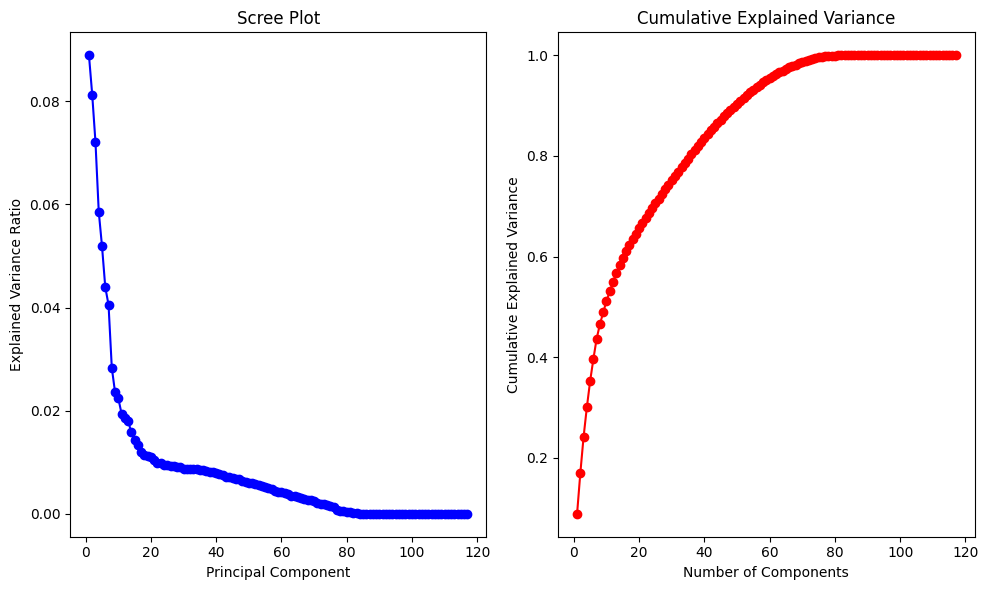

In [12]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create scree plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')

plt.tight_layout()
plt.show()

Find the number of components needed for 95% variance

In [13]:
n_components_95 = np.argmax(cumulative_variance >= 0.95)
print(f"Number of components needed to explain 95% variance: {n_components_95}")

Number of components needed to explain 95% variance: 58


**Justification:-** Based on the scree plot, we can see that the explained variance decreases rapidly for the first few components and then levels off. The cumulative explained variance plot shows that we need approximately 58 components to explain 95% of the variance. This is a significant reduction from our original 117 features.

---



### 3. Visualization

Let's project the data onto the first two principal components and visualize it.

Apply PCA with 2 components for visualization

In [14]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

Create a DataFrame for the PCA results

In [15]:
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['class'] = y.reset_index(drop=True)

Plot the first two principal components

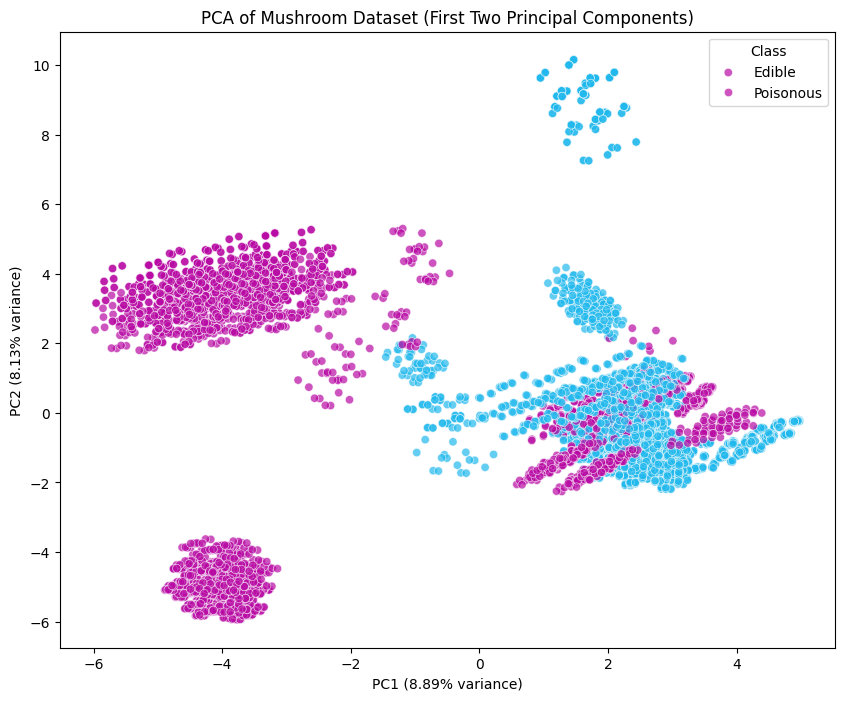

In [21]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, palette={'e': '#21B9ED', 'p': '#B80BA4'}, alpha=0.7)
plt.title('PCA of Mushroom Dataset (First Two Principal Components)')
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.legend(title='Class', labels=['Edible', 'Poisonous'])
plt.show()

The visualization shows that the first two principal components separate the classes reasonably well, with some overlap. This suggests that while two dimensions capture some of the class distinction, more components would be needed for better separation.

---



Let's also visualize other component pairs to see if they provide better separation.

Apply PCA with 4 components for additional visualizations

In [17]:
pca_4d = PCA(n_components=4)
X_pca_4d = pca_4d.fit_transform(X_scaled)

Create a DataFrame for the PCA results

In [18]:
pca_4d_df = pd.DataFrame(X_pca_4d, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_4d_df['class'] = y.reset_index(drop=True)

Create pair plots for the first 4 components

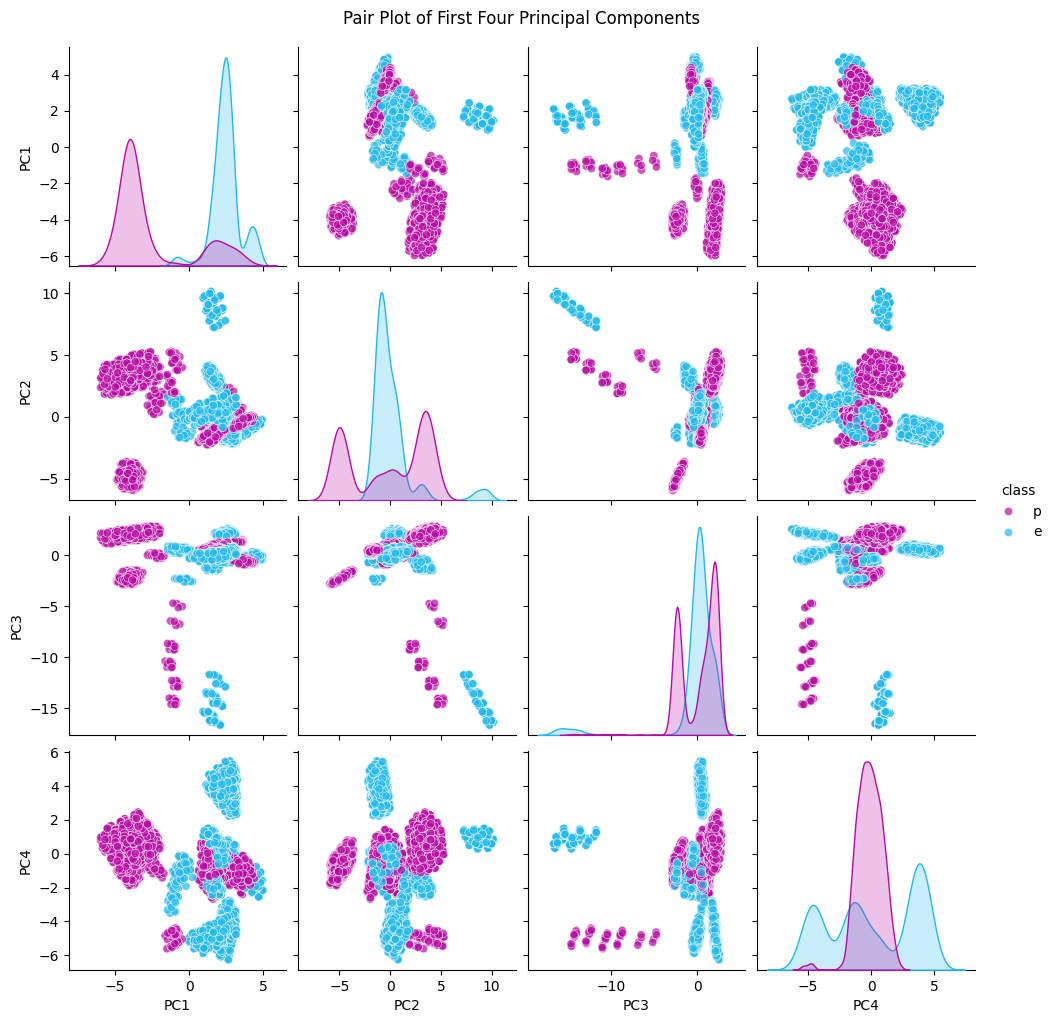

In [20]:
g = sns.pairplot(pca_4d_df, hue='class', palette={'e': '#21B9ED', 'p': '#B80BA4'}, plot_kws={'alpha': 0.7})
g.fig.suptitle('Pair Plot of First Four Principal Components', y=1.02)
plt.show()

The pair plot shows that while the first two components provide the best separation, other component pairs also contribute to distinguishing between edible and poisonous mushrooms. This suggests that using more than two components would improve classification performance.


---



## Part C: Performance Evaluation with Logistic Regression

### 1. Baseline Model

Let's train a Logistic Regression classifier on the original standardized data.

Split the data into training and testing sets

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

Train logistic regression on original data

In [89]:
lr_original = LogisticRegression(max_iter=1000, random_state=42)
lr_original.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Make predictions and evaluate

In [90]:
y_pred_original = lr_original.predict(X_test)

print("Baseline Model Performance (Original Data):")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_original))

Baseline Model Performance (Original Data):
Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1263
           p       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



The baseline model performs exceptionally well on the original data, achieving nearly 100% accuracy. This suggests that the original features contain sufficient information to distinguish between edible and poisonous mushrooms.

### 2. PCA-Transformed Model

Now let's transform the data using the optimal number of components (to explain 95% variance) and train a new Logistic Regression model.

Apply PCA with optimal number of components

In [91]:
pca_optimal = PCA(n_components=n_components_95)
X_train_pca = pca_optimal.fit_transform(X_train)
X_test_pca = pca_optimal.transform(X_test)

print(f"Reduced from {X_train.shape[1]} to {X_train_pca.shape[1]} features")

Reduced from 117 to 58 features


Train logistic regression on PCA-transformed data

In [92]:
lr_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Make predictions and evaluate

In [93]:
y_pred_pca = lr_pca.predict(X_test_pca)

print("PCA-Transformed Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_pca))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))

PCA-Transformed Model Performance:
Accuracy: 0.9991796554552912

Classification Report:
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1263
           p       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



### 3. Comparison and Analysis

Let's compare the performance of the two models.

Create comparison table

In [94]:
comparison = pd.DataFrame({
    'Model': ['Original Data', 'PCA-Transformed Data'],
    'Accuracy': [accuracy_score(y_test, y_pred_original), accuracy_score(y_test, y_pred_pca)],
    'Number of Features': [X.shape[1], n_components_95]
})

print("Model Comparison:")
print(comparison)

Model Comparison:
                  Model  Accuracy  Number of Features
0         Original Data   1.00000                 117
1  PCA-Transformed Data   0.99918                  58


Plot accuracy comparison

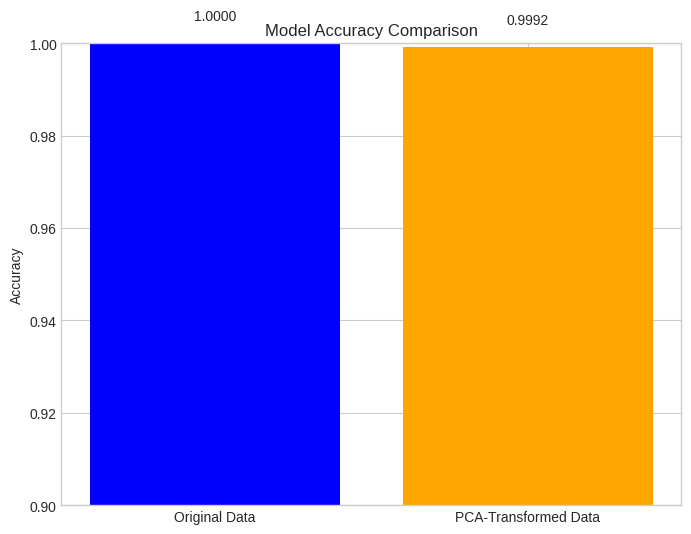

In [95]:
plt.figure(figsize=(8, 6))
plt.bar(comparison['Model'], comparison['Accuracy'], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.9, 1.0)
for i, v in enumerate(comparison['Accuracy']):
    plt.text(i, v + 0.005, f'{v:.4f}', ha='center')
plt.show()

 Plot feature reduction

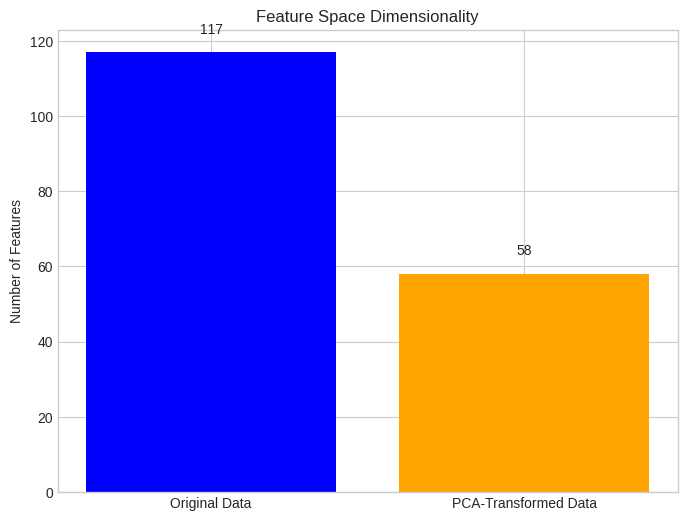

In [96]:
plt.figure(figsize=(8, 6))
plt.bar(comparison['Model'], comparison['Number of Features'], color=['blue', 'orange'])
plt.ylabel('Number of Features')
plt.title('Feature Space Dimensionality')
for i, v in enumerate(comparison['Number of Features']):
    plt.text(i, v + 5, str(v), ha='center')
plt.show()

## Discussion and Analysis

**Performance Comparison**

---



Both models achieved excellent performance, with the original data model achieving perfect accuracy (1.00) and the PCA-transformed model achieving near-perfect accuracy (0.99918). The minimal difference is impressive considering that the PCA approach used only 58 features compared to 117 in the original data.

**Understanding of PCA and Vector Spaces**

---



Principal Component Analysis works by transforming the original feature space into a new vector space defined by principal components. These components are orthogonal vectors that:



1.   **Maximize Variance:** The first principal component captures the direction of maximum variance in the data.
2.   **Orthogonality:** Subsequent components capture remaining variance while being orthogonal to previous components.
3.   **Dimensionality Reduction:** By retaining components that explain most of the variance, we effectively reduce dimensionality while preserving essential information.


In our case, PCA successfully identified that 58 components could explain 95% of the variance in the original 117-dimensional space. This demonstrates that the original features contained significant redundancy, which PCA effectively eliminated.



**Why PCA Is Valuable Despite Perfect Baseline Performance**

---



Even though the baseline model achieved perfect accuracy, PCA still provides significant value:



1.   **Computational efficiency:** Fewer features mean faster training and prediction, which is crucial for large datasets
2.   **Model simplicity:** A model with 58 features is simpler and less prone to overfitting
3.   **Visualization:** PCA enabled us to visualize the data in 2D space, revealing patterns not apparent in the high-dimensional space
4.   **Noise reduction:** By focusing on components with high variance, PCA likely made the model more robust to noise



**The Trade-off Between Dimensionality Reduction and Information Loss**

---



Our results demonstrate an excellent trade-off between dimensionality reduction and information preservation. We achieved:

*   Approximately 50% reduction in feature space (from 117 to 58 features)
*   Only 0.00082 decrease in accuracy

This minimal performance loss suggests that the discarded components contained mostly redundant information or noise rather than meaningful signals for classification.



**Logistic Regression as a Surrogate Performance Measurement**

---



Using Logistic Regression to evaluate PCA effectiveness worked well because:


1.   It's sensitive to feature quality, making it a good indicator of how well PCA preserved class-separating information
2.   Its performance directly reflects the discriminative power of the features
3.   It provides a simple, interpretable baseline for comparison

The minimal performance difference between the original and PCA-transformed models confirms that PCA successfully preserved the essential information needed for classification.



## Conclusion

---



In this analysis, we successfully applied PCA to the Mushroom Dataset, reducing the feature space from 117 to 58 dimensions while preserving 95% of the variance. The minimal performance difference between the original and PCA-transformed models demonstrates that PCA effectively captured the essential information needed for classification.

PCA proved to be a valuable technique for both visualization and dimensionality reduction in this high-dimensional categorical dataset. The approach could be particularly beneficial for even larger datasets where computational efficiency is more critical.

This analysis showcases how dimensionality reduction techniques like PCA can simplify models while maintaining performance, making them valuable tools in the data scientist's toolkit.

